<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/akaike_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Dependencies
Let's install PyTorch and fastai libraries first. You have to repeat this step every time you restart this notebook in colab.

In [25]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


In [26]:
import torch
print(torch.__version__)
import fastai
print(fastai.__version__) #1.0.42


1.0.0.dev20181206
1.0.42


In [0]:
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

## Import Dataset

###import data directly


In [0]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [29]:
train.head()

text      id
0  Keep your gloves, hats, coats and jackets toge...  122885
1  The Home Dynamix Serendipity Ivory 5 ft. 2 in....  188958
2  The Bosch 18-Volt lithium-ion line of Cordless...  146065
3  Restore your Porter-Cable sander or polisher t...  165138
4  The SPIKECUBE Surge Suppressor from Tripp Lite...  185565

In [30]:
test.head()

text      id
0  These machine screw nuts are designed to be us...  114689
1  The M18 FUEL Drill/Driver is the Most Powerful...  183172
2  Steel City 2-Gang 30 cu. in. Square Electrical...  217304
3  Native Collection Plus has Shaw's SilentStep P...  184115
4  Fasade decorative 4 ft. x 8 ft. vinyl wall pan...  103786

In [31]:
train.shape

(41569, 2)

## from_df       [source](https://github.com/fastai/fastai/blob/master/fastai/text/data.py#L157)
from_df(path:PathOrStr, train_df:DataFrame, valid_df:DataFrame, test_df:OptDataFrame=None, tokenizer:Tokenizer=None, vocab:Vocab=None, classes:StrList=None, text_cols:Union[int, Collection[int], str, StrList]=1, label_cols:Union[int, Collection[int], str, StrList]=0, label_delim:str=None, kwargs) → DataBunch

Create a [TextDataBunch](https://docs.fast.ai/text.data.html#TextDataBunch) from DataFrames.


This method will use train_df, valid_df and maybe test_df to build the TextDataBunch in path. You can specify text_cols and label_cols.**If there are several text_cols, the texts will be concatenated together with an optional field token.**
If there are several label_cols, the labels will be assumed to be one-hot encoded and classes will default to label_cols (you can ignore that argument for a language model). tokenizer will be used to parse those texts into tokens.

You can pass a specific vocab for the numericalization step (if you are building a classifier from a language model you fine-tuned for instance). kwargs will be split between the [TextDataset](https://docs.fast.ai/text.data.html#TextDataset) function and to the class initialization, you can precise there parameters such as max_vocab, chunksize, min_freq, n_labels (see the [TextDataset](https://docs.fast.ai/text.data.html#TextDataset) documentation) or bs, bptt and pad_idx (see the sections LM data and classifier data).



##Create Dataframe
This provides the Label/Target and the associated text

In [32]:
# create a dataframe
train_df = pd.DataFrame({'text':train.text,
                   'id':train.id})
print(train_df.shape)
train_df.head()

(41569, 2)


id                                               text
0  122885  Keep your gloves, hats, coats and jackets toge...
1  188958  The Home Dynamix Serendipity Ivory 5 ft. 2 in....
2  146065  The Bosch 18-Volt lithium-ion line of Cordless...
3  165138  Restore your Porter-Cable sander or polisher t...
4  185565  The SPIKECUBE Surge Suppressor from Tripp Lite...

In [33]:
test_df = pd.DataFrame({'text':test.text,
                        'id':test.id})
print(test_df.shape)
test_df.head()

(10393, 2)


id                                               text
0  114689  These machine screw nuts are designed to be us...
1  183172  The M18 FUEL Drill/Driver is the Most Powerful...
2  217304  Steel City 2-Gang 30 cu. in. Square Electrical...
3  184115  Native Collection Plus has Shaw's SilentStep P...
4  103786  Fasade decorative 4 ft. x 8 ft. vinyl wall pan...

In [0]:
train_label = pd.read_csv('train_label.csv')
test_label = pd.read_csv('sample_submission.csv')



In [36]:
train_label

id                     label
0      100003                     Shape
1      100004           Voltage (volts)
2      100004           Wattage (watts)
3      100006           Wattage (watts)
4      100007     ENERGY STAR Certified
5      100008                    Finish
6      100008            Indoor/Outdoor
7      100008          Package Quantity
8      100011                  Features
9      100011                  Included
10     100012                  Features
11     100012         Hardware Included
12     100012                  Included
13     100015          Package Quantity
14     100016                     Shape
15     100017            Indoor/Outdoor
16     100017          Package Quantity
17     100022     ENERGY STAR Certified
18     100022           Voltage (volts)
19     100026                     Shape
20     100027     ENERGY STAR Certified
21     100028          Package Quantity
22     100030                  Included
23     100035                     Color
24     100035            Indoor/Outdoor
25     100036         Assembly Required
26     100036                  Included
27     100038        Tools Product Type
28     100038           Voltage (volts)
29     100040         Hardware Included
...       ...                       ...
75140  224390  Commercial / Residential
75141  224391        Tools Product Type
75142  224392          Package Quantity
75143  224397        Tools Product Type
75144  224398        Tools Product Type
75145  224398           Voltage (volts)
75146  224400           Voltage (volts)
75147  224401          Package Quantity
75148  224402        Tools Product Type
75149  224403     ENERGY STAR Certified
75150  224403           Wattage (watts)
75151  224404                     Color
75152  224404            Indoor/Outdoor
75153  224406     ENERGY STAR Certified
75154  224406         Hardware Included
75155  224406                  Included
75156  224406           Wattage (watts)
75157  224414  Commercial / Residential
75158  224414            Indoor/Outdoor
75159  224414           Voltage (volts)
75160  224416                    Finish
75161  224419          Package Quantity
75162  224421                  Included
75163  224421                     Shape
75164  224421           Voltage (volts)
75165  224421           Wattage (watts)
75166  224422                    Finish
75167  224422            Indoor/Outdoor
75168  224422          Package Quantity
75169  224423         Hardware Included

[75170 rows x 2 columns]

In [39]:
train_label['label'].unique().tolist()


['Shape',
 'Voltage (volts)',
 'Wattage (watts)',
 'ENERGY STAR Certified',
 'Finish',
 'Indoor/Outdoor',
 'Package Quantity',
 'Features',
 'Included',
 'Hardware Included',
 'Color',
 'Assembly Required',
 'Tools Product Type',
 'Commercial / Residential',
 'Flooring Product Type']

In [0]:
df= train_df.append(test_df, ignore_index=True)


In [0]:
df_full = train.append(test, ignore_index=True)
df_full.head()

text      id
0  Keep your gloves, hats, coats and jackets toge...  122885
1  The Home Dynamix Serendipity Ivory 5 ft. 2 in....  188958
2  The Bosch 18-Volt lithium-ion line of Cordless...  146065
3  Restore your Porter-Cable sander or polisher t...  165138
4  The SPIKECUBE Surge Suppressor from Tripp Lite...  185565

In [0]:
df.shape

(51962, 2)

In [0]:
df = df.reset_index(drop = True)
df.head()

label    text
0  Keep your gloves, hats, coats and jackets toge...  122885
1  The Home Dynamix Serendipity Ivory 5 ft. 2 in....  188958
2  The Bosch 18-Volt lithium-ion line of Cordless...  146065
3  Restore your Porter-Cable sander or polisher t...  165138
4  The SPIKECUBE Surge Suppressor from Tripp Lite...  185565

In [0]:
df['label'].value_counts()

The new All-Pro Dusk-to-Dawn LED Twin Head Round Flood fixtures utilize the latest in LED technology for maximum light output in a low-profile, compact housing. This design is ideal as a direct replacement for traditional styles, producing the equivalent of a 150-Watt incandescent fixture. Available in white or bronze, they can be wall or eave mounted for a wide range of applications. All-Pro LED outdoor security lighting provides the safety of super bright lighting, energy savings up to 90%, and the convenience of 1-time installation without re-lamping.Integral photocell provides dusk to dawn operation1600 lumens5000KDie-cast metal housing5 year warrantyEasy installationRound, low-profile design; direct replacement for traditional halogenMaintenance-free LEDs with 35,000 hours of lifeHome Depot Protection Plan:                                                                                                                                                                                 

## Preprocessing

Tokenization

Remove StopWords
Detokenization

In [0]:
#df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

#import nltk
#nltk.download('stopwords')

#from nltk.corpus import stopwords 
#stop_words = stopwords.words('english') 

# tokenization 
#tokenized_doc = df['text'].apply(lambda x: x.split())

# remove stop-words 
#tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 

# de-tokenization 
#detokenized_doc = [] 
#for i in range(len(df)): 
#    t = ' '.join(tokenized_doc[i]) 
#    detokenized_doc.append(t) 
#df['text'] = detokenized_doc

With all the preprocessing

Total time: 1:33:54

epoch	train_loss	valid_loss	accuracy

1	4.754789	4.648754	0.211260

2	4.666183	4.557329	0.219218

3	4.524086	4.437946	0.229403

4	4.361761	4.323431	0.239714

5	4.235765	4.290059	0.243043

We could achieve only 24% accuracy while when we moved to pure FASTAI processing then we achieved the accuracy of the Language Model to be starting with almost 30% and hence strengthened the beliefs in the capability of FASTAI.


In [0]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(df, test_size = 0.25, random_state = 12)

In [0]:
df_trn.shape, df_val.shape

((38971, 2), (12991, 2))

## Data Preparation

### Language model data
for learning the Language semantics

### Classifier model data
for learning the classification Task on text data

**text.learner contains helper functions to quickly create a language model or an RNN classifier**


In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val,path = "")

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val,vocab=data_lm.train_ds.vocab, bs=48)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
The Slant/Fin 3 ft. Hydronic Baseboard is durable. This baseboard is sure to harmonize with almost any decor. The baked enamel finish serves as an ideal base for either paint or wallpaper.Covers a baseboard heat pipeBaked enamel, nu-white finish is sure to match almost any home decorBaked enamel finish serves as an ideal base for paint or wallpaperDurableNOTE: end caps are sold separately - Fine/Line 30 3-3/4 in. right-hand end cap for baseboard heaters model # 101-405 - Fine/Line 30 3-3/4 in. left-hand end cap for baseboard heaters model # 101-404Note: Product may vary by store., This cordless chainsaw with extension pole from the WORX gives you a versatile tool. With the added extension pole, the WORX JawSaw can prune branches up to 11 ft. It is lightweight, port

This does all the necessary preprocessing behing the scene. For the classifier, we also pass the vocabulary (mapping from ids to words) that we want to use: this is to ensure that data_clas will use the same dictionary as data_lm.



In [0]:
#Fine-tuning a language model
#We can use the data_lm object we created earlier to fine-tune a pretrained language model.
#fast.ai has an English model available that we can download. 
#We can create a learner object that will directly create a model, 
#download the pretrained weights and be ready for fine-tuning.
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.7)

In [0]:
# train the learner object
learn.fit_one_cycle(3, 1e-2) #18.7

In [0]:
learn.save_encoder('ft_enc51')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


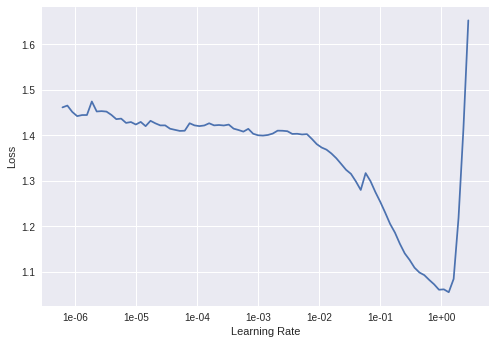

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-2) # accuracy 36.48%

Total time: 1:15:38

epoch	train_loss	valid_loss	accuracy

1	3.366866	3.224195	0.341396

2	3.138331	3.036599	0.364828


In [0]:
learn.save_encoder('ft_enc52')
#this times out, so fit one cycle 5+5 instead of 10 so we store encoder as well after 5 steps

In [0]:

learn.fit_one_cycle(2, 1e-2) 
learn.save_encoder('ft_enc53')# accuracy 37.1%
#Finally we save the encoder to be able to use it for classification in the next section.

Total time: 1:15:29

epoch	train_loss	valid_loss	accuracy

1	3.280402	3.137232	0.350499

2	3.079993	2.984949	0.371016


In [0]:
learn.predict("This is a review about", n_words=15)

'This is a review about xxbos 7 xxrep 4 0 1 xxbos 8 xxrep 4 2 xxbos 1 xxrep 4'

##Building a classifier
We now use the data_clas object we created earlier to build a classifier with our fine-tuned encoder. The learner object can be done in a single line.



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


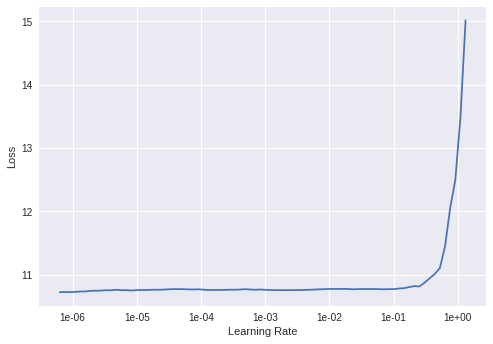

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
#load the encoder models in models folder
#!mkdir models
#!mv ft_enc53.pth models/
#!mv tmp.pth models/

In [0]:
learn = text_classifier_learner(data_clas, drop_mult=0.7)
learn.load_encoder('ft_enc53')

In [0]:
learn.fit_one_cycle(1, 1e-2)

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))


RuntimeError: ignored

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))


RuntimeError: ignored

In [0]:
learn.fit_one_cycle(2, slice(2e-3/100, 2e-3))


In [0]:
print("process completed")

process completed
